In [403]:
##from google.colab import files
#uploaded = files.upload()

In [404]:
from tensorflow import keras
from tensorflow.keras import layers

In [405]:
!ls


 insurance_data.csv  'laptop (1).csv'   laptop.csv   sample_data


In [406]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# read the csv file
df = pd.read_csv('insurance_data.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [407]:
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'female' else 1)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [408]:
df['smoker'] = df['smoker'].apply( lambda x: 0 if x == 'no' else 1)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [409]:
region_dummies = pd.get_dummies(df['region'], drop_first=True, dtype=int)
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [410]:
df = pd.concat([df, region_dummies], axis='columns')
df

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,1,0,0
1334,18,0,31.920,0,0,northeast,2205.98080,0,0,0
1335,18,0,36.850,0,0,southeast,1629.83350,0,1,0
1336,21,0,25.800,0,0,southwest,2007.94500,0,0,1


In [411]:
df.drop(['region'], axis = 1, inplace = True)
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [412]:
X = df.drop(columns =['charges'])
y = df['charges']

X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [413]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [414]:
X.shape


(1338, 8)

In [415]:
y.shape


(1338,)

In [416]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [417]:
y = y.reshape(-1,1)


In [418]:
X

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [419]:
y

array([[16884.924 ],
       [ 1725.5522],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.36  ]], dtype=float32)

In [420]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [421]:
N , D = X_train.shape


In [422]:
N , D


(1070, 8)

In [423]:
X_test.shape


(268, 8)

In [424]:
y_train.shape

(1070, 1)

In [425]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#y_train = scaler.fit_transform(y_train)
#y_test = scaler.transform(y_test)

In [426]:
#model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(D,)), tf.keras.layers.Dense(1, activation='sigmoid')])

#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(1, activation='sigmoid',input_shape=(D,)))
##model.add(tf.keras.layers.Dense(32, activation='relu',input_shape=(D,)))


model = keras.Sequential(
    [
     layers.Dense(10,activation="relu",input_shape=(D,)),
     layers.Dense(10,activation="relu"),
     layers.Dense(1,activation="sigmoid")
    ]
)


In [427]:
#Alternative
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(1, activation='sigmoid',input_shape=(D,)))

**Keras Regression Metrics**

•Mean Squared Error: mean_squared_error, MSE or mse

•Mean Absolute Error: mean_absolute_error, MAE, mae

•Mean Absolute Percentage Error: mean_absolute_percentage_error, MAPE, mape

•Cosine Proximity: cosine_proximity, cosine



**Keras Classification Metrics**

•Binary Accuracy: binary_accuracy, acc

•Categorical Accuracy: categorical_accuracy, acc

•Sparse Categorical Accuracy: sparse_categorical_accuracy

•Top k Categorical Accuracy: top_k_categorical_accuracy (requires you specify a k parameter)

•Sparse Top k Categorical Accuracy: sparse_top_k_categorical_accuracy (requires you specify a k parameter)





In [428]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

#model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

# For binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# For multi-class classification
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Setting an appropriate learning rate
#from keras.optimizers import Adam
#opt = Adam(learning_rate=0.001)
#model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [429]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

#r = model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: -7626.7852 - accuracy: 0.0000e+00 - val_loss: -10879.7363 - val_accuracy: 0.0000e+00
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: -18183.6699 - accuracy: 0.0000e+00 - val_loss: -23397.2852 - val_accuracy: 0.0000e+00
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: -33301.1172 - accuracy: 0.0000e+00 - val_loss: -41394.1484 - val_accuracy: 0.0000e+00
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: -54441.5352 - accuracy: 0.0000e+00 - val_loss: -66252.3984 - val_accuracy: 0.0000e+00
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: -83470.3125 - accuracy: 0.0000e+00 - val_loss: -99525.0703 - val_accuracy: 0.0000e+00
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: -122871.6641 - accuracy: 0.0000e+00 - val_loss: -143936.0312 - val_accuracy: 0.0000e+00
Epoch 7/100
34/34 [==========================

In [430]:
r.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [431]:
print('Train Score:', model.evaluate(X_train, y_train))
print('Test Score:', model.evaluate(X_test, y_test))



34/34 [==============================] - 0s 2ms/step - loss: -375424544.0000 - accuracy: 0.0000e+00
Train Score: [-375424544.0, 0.0]
9/9 [==============================] - 0s 2ms/step - loss: -335086592.0000 - accuracy: 0.0000e+00
Test Score: [-335086592.0, 0.0]


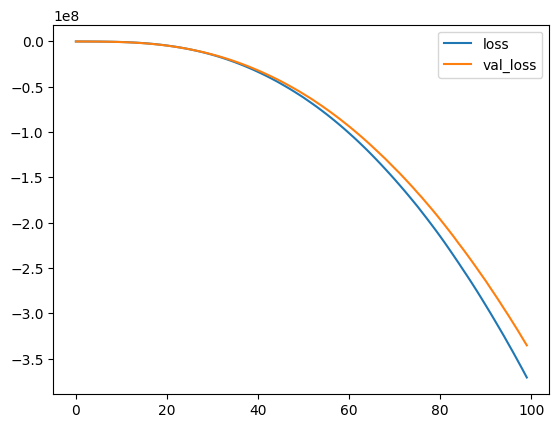

In [432]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();


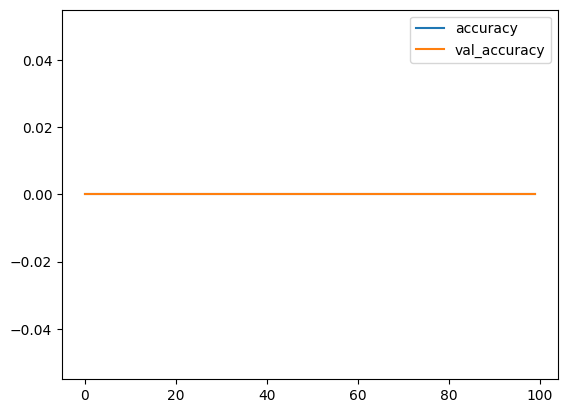

In [433]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

In [434]:
df.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
charges      0
northwest    0
southeast    0
southwest    0
dtype: int64